# Decision Trees and Ensemble Learning

Decision trees split the data set into branches and make decisions by a series of < or > comparisons.  So if you look at where a decision tree makes its choices, you'll see a bunch of rectangles.  However, if you set your depth too high you may see overfitting.

In [1]:
import numpy
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

import sys

sys.path.append("../")

from common import util

## Loading Data

In [2]:
input_file = "data_decision_trees.txt"

data = numpy.loadtxt(input_file, delimiter=',')

# First two columns are features
# Last column is the classification (0 or 1)
features, classes = data[:, :-1], data[:, -1]

class0 = features[classes == 0]
class1 = features[classes == 1] # TODO: Do I need to wrap this in numpy.array?

## Visualizing Input Data

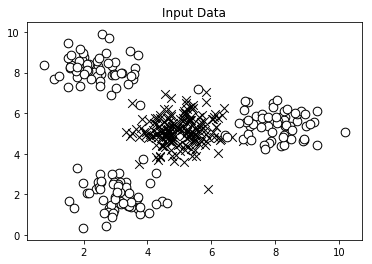

In [3]:
pyplot.figure()
pyplot.scatter(class0[:, 0], class0[:, 1], s=75, facecolors="black", edgecolors="black", linewidth=1, marker="x")
pyplot.scatter(class1[:, 0], class1[:, 1], s=75, facecolors="white", edgecolors="black", linewidth=1, marker="o")
pyplot.title("Input Data")
pyplot.show()

## The Actual Decision Tree

- **Precision:** Classification's accuracy
- **Recall:** The fraction of relevant elements selected
- **Support:** The number of elements in this class

Good classifiers have high precision and recall, but in practice there's usually a trade-off.  The F1 score (the harmonic mean of precision and recall) gives a nice balance between the two.

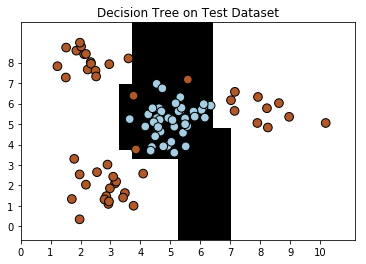

############################################################
Classifier Performance on Test Dataset:
             precision    recall  f1-score   support

    Class-0       0.93      1.00      0.97        43
    Class-1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90

############################################################
Classifier Performance on Training Dataset:
             precision    recall  f1-score   support

    Class-0       0.99      1.00      1.00       137
    Class-1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270

############################################################


In [5]:
def classify(test_size=0.25, max_depth=4):
    split = model_selection.train_test_split(features, classes, test_size=test_size, random_state=5)
    feature_train, feature_test = split[0], split[1]
    class_train, class_test = split[2], split[3]

    classifier = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    classifier.fit(feature_train, class_train)
    util.visualize_classifier(classifier, feature_test, class_test, "Decision Tree on Test Dataset")

    test_predictions = classifier.predict(feature_test)
    train_predictions = classifier.predict(feature_train)
    target_names = ("Class-0", "Class-1")

    util.print_classification_report(class_test, test_predictions, class_train, train_predictions, target_names)

classify()